<a href="https://colab.research.google.com/github/ChaitanyaKulkarni001/MachineLearning/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recurreny Nueral Network**

# Part 1 - Data Preprocessing

importing Libraries

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the dataset

In [49]:
dataset = pd.read_csv ("Google_Stock_Price_Train.csv")
training_set = dataset.iloc[:,1:2].values

Feature Scaliing

In [50]:
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler( feature_range = (0,1) )
training_set_scaled = sc.fit_transform(training_set)

# training_set_scaled = sc.fit(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [51]:
# type(training_set_scaled)
# training_set_scaled[ 0:60,0]
# X_train


In [52]:
from os import X_OK
X_train = []
y_train=[]
for i in range(60,1258):
  X_train.append(training_set_scaled[ i-60:i ,0])
  y_train.append(training_set_scaled[ i ,0])

# print(type(X_train))
X_train,y_train = np.array(X_train),np.array(y_train)
# print(X_train.size)
# print((1258-60 )*60)

# X_train[0] # size 60


In [53]:
# X_train[61][0]


In [54]:
X_train = np.reshape (X_train,(X_train.shape[0],X_train.shape[1],1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [55]:
X_train[0].size

60

BUildin RNN

In [56]:
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout


In [57]:
regressor = Sequential()

In [58]:
regressor.add(LSTM(units=50 , return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
regressor.add(LSTM(units=50 , return_sequences = True))
regressor.add(Dropout(0.2))

In [60]:
regressor.add(LSTM(units=50 , return_sequences = True))
regressor.add(Dropout(0.2))

In [61]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [62]:
regressor.add(Dense(units=1))

In [63]:
# regressor.compile (optimizer='adam',loss = 'mean_squared_error')

Complile The RNN


In [64]:
regressor.compile(optimizer='adam', loss="mean_squared_error")


Fitting the RNN on training set

In [65]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - loss: 0.0931
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - loss: 0.0069
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - loss: 0.0052
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 0.0045
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - loss: 0.0049
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0041
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 116ms/step - loss: 0.0047
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0039
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0043
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - loss: 0.0046
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0041
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0036
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 0.0043
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 123ms/step - loss: 0.0031
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97

In [66]:
dataset_test = pd.read_csv ("Google_Stock_Price_Test.csv")
actualStockPrice = dataset_test.iloc[:,1:2].values

In [72]:
dataset_total = pd.concat((dataset['Open'],dataset_test['Open']),axis=0)

Horizontal - axis 1
Vertical concate axis 0

In [73]:
inputs = dataset_total[ len(dataset_total)-len(dataset_test)-60 :].values
#  dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [80]:
print(len(inputs))
print(len(dataset_test))

80
20


In [91]:
print(inputs)
inputs = inputs.reshape(-1,1)


[779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85 798.24
 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89 778.2
 767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97 755.2
 766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07 757.44
 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4  797.34
 800.4  790.22 796.76 795.84 792.36 790.9  790.68 793.7  783.33 782.75
 778.81 788.36 786.08 795.26 806.4  807.86 805.   807.14 807.48 807.08
 805.81 805.12 806.91 807.25 822.3  829.62 837.81 834.71 814.66 796.86]


In [92]:
# inputs.reshape(-1,1)
inputs = sc.transform (inputs)

In [93]:
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i])

X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


In [94]:
prediction = regressor.predict(X_test)
prediction = sc.inverse_transform(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


In [95]:
print(prediction)

[[784.0877 ]
 [781.2531 ]
 [781.87195]
 [783.0504 ]
 [786.37854]
 [792.3512 ]
 [797.2966 ]
 [798.9021 ]
 [799.21704]
 [799.12805]
 [798.9995 ]
 [798.7921 ]
 [798.70154]
 [799.44116]
 [800.505  ]
 [805.7402 ]
 [812.6924 ]
 [819.8281 ]
 [823.0986 ]
 [817.9134 ]]


In [96]:
print(actualStockPrice)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


# **Vizualization**

<ipython-input-97-cddd5ccd83ea>:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


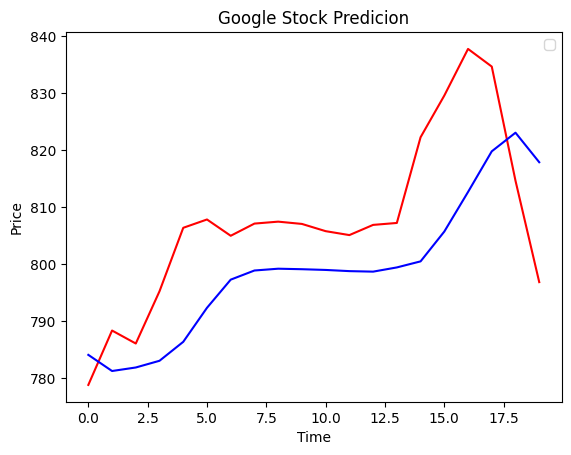

In [97]:
plt.plot(actualStockPrice,color='red')
plt.plot(prediction,color='blue')
plt.title("Google Stock Predicion")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
